# Cluster Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Import Packages and Lead Dataset

> ## 1) Import Packages

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

> ## 2) Load Dataset

* Load iris Dataset

In [7]:
import seaborn as sns

iris = sns.load_dataset('iris')

* iris DataFrame

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* pandas DataFrame

In [11]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> ## 3) 'X' Only DataFrame

In [13]:
DF = iris.iloc[:, :-1].copy()

DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. K-means Clustering

> ## 1) Modeling

* n_clusters : 군집 개수 지정
* init : 초기 중심 설정 방식(기본값)
* max_iter : 최대 반복 횟수

In [16]:
from sklearn.cluster import KMeans
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho

In [17]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, 
                  init ='k-means++', 
                  max_iter = 15, 
                  random_state = 2045)

kmeans_3.fit(DF)

KMeans(max_iter=15, n_clusters=3, random_state=2045)

> ## 2) Clustering Results

* 반복 횟수

In [19]:
kmeans_3.n_iter_ 

5

* 군집별 중심점

In [21]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

* 군집 결과 레이블

In [23]:
kmeans_3.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

* 군집 중심까지의 제곱 거리의 합

In [25]:
kmeans_3.inertia_ 

78.85144142614602

# 3. Scree Plot

> ## 1) K(1~9) 군집분석

In [28]:
inertia = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(DF)
    inertia.append(kmeanModel.inertia_)

> ## 2) 군집 중심까지의 제곱 거리의 합

In [30]:
inertia

[681.3706000000001,
 152.34795176035792,
 78.85144142614602,
 57.22847321428572,
 46.44618205128205,
 39.03998724608725,
 34.421674242424245,
 30.13784307359308,
 28.208283633033634]

> ## 3) Plot the elbow

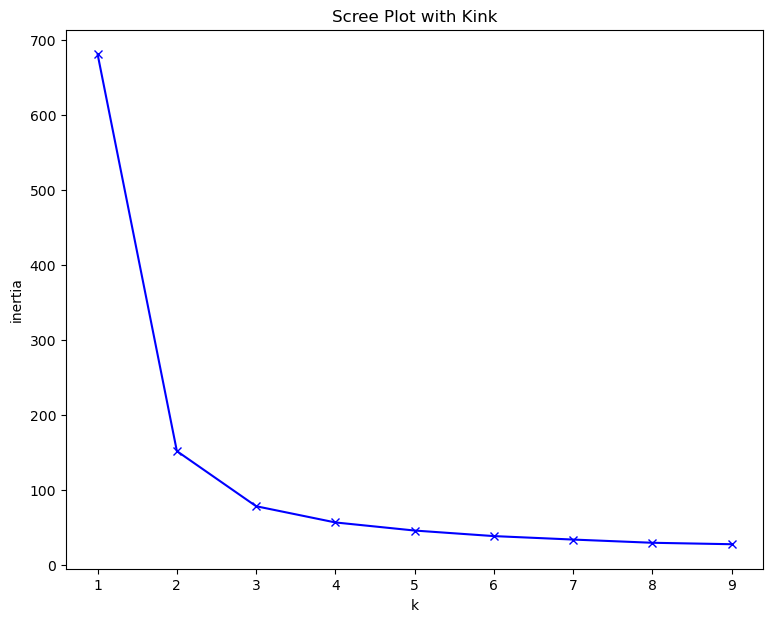

In [32]:
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

# 4. visualization with PCA(Principal Component Analysis)

> ## 1) target 및 cluster 추가

In [35]:
DF['cluster'] = kmeans_3.labels_
DF['target'] = iris.species 

In [36]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa


> ## 2) 군집 결과 확인

In [38]:
DF.groupby('target')['cluster'].value_counts()

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          36
            0          14
Name: count, dtype: int64

> ## 3) PCA 차원 축소(4차원 -> 2차원)

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
from sklearn.decomposition import PCA
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', def

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.iloc[:, :-1])
print(pca.explained_variance_ratio_) # 설명력
pca_transformed[:5]

[0.92461872 0.05306648]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

> ## 4) pca_x와 pca_y 추가

In [43]:
DF['pca_x'] = pca_transformed[:, 0]
DF['pca_y'] = pca_transformed[:, 1]

In [44]:
DF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755


> ## 5) 2차원 시각화

* 군집 값 0, 1, 2 인덱스 추출

In [46]:
idx_0 = DF[DF['cluster'] == 0].index
idx_1 = DF[DF['cluster'] == 1].index
idx_2 = DF[DF['cluster'] == 2].index

In [47]:
idx_0, idx_1, idx_2

(Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 101, 106, 113, 114, 119, 121, 123, 126,
        127, 133, 138, 142, 146, 149],
       dtype='int64'),
 Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype='int64'),
 Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115,
        116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135,
        136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
       dtype='int64'))

* 0, 1, 2 인덱스 시각화 

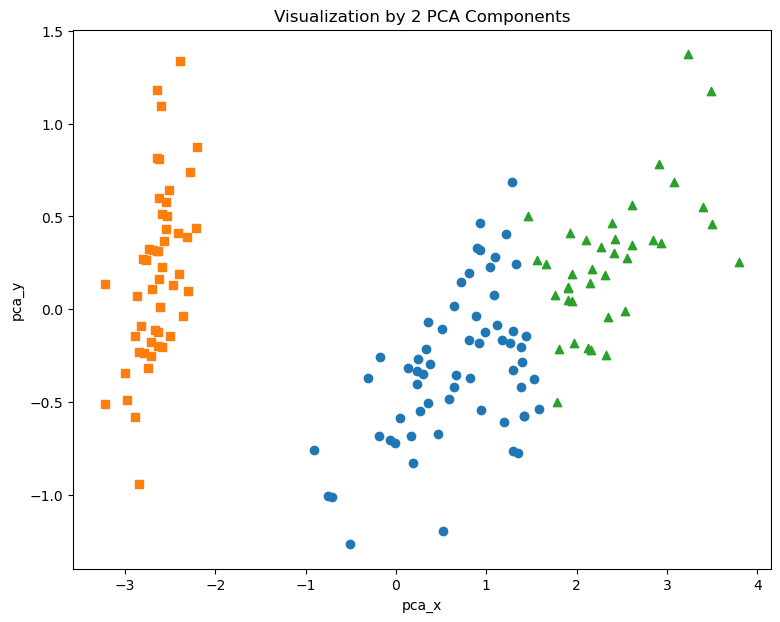

In [49]:
plt.figure(figsize = (9, 7))
plt.scatter(x = DF.loc[idx_0, 'pca_x'], 
            y = DF.loc[idx_0, 'pca_y'], 
            marker = 'o')
plt.scatter(x = DF.loc[idx_1, 'pca_x'], 
            y = DF.loc[idx_1, 'pca_y'], 
            marker = 's')
plt.scatter(x = DF.loc[idx_2, 'pca_x'], 
            y = DF.loc[idx_2, 'pca_y'], 
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()

# 5. Silhouette Analysis

* 각 군집 간의 거리가 얼마나 효율적으로 분리되었는지 성능 평가
 - 다른 군집과의 거리는 멀고, 군집 내 데이터 포인트 간의 거리는 가깝게 형성
<br>
<br>
* 실루엣 계수(Silhouette Coefficient) 측정지표
 - <font color = 'green'>개별 데이터 포인트</font>가 가지는 군집화 지표
 - 데이터 포인트가 <font color = 'red'>같은 군집 내</font>의 다른 데이터 포인트와 얼나마 가깝게 군집되어 있고
 - <font color = 'blue'>다른 군집</font>에 있는 데이터 포인트와 얼마나 멀게 분리되어 있는지 나타내는 지표




> ## 1) DF에 'Clustering' 추가

* 3개로 군집분석한 결과 사용

In [53]:
DF['Clustering'] = kmeans_3.labels_

In [54]:
DF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,0,virginica,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,2


> ## 2) 실루엣 계수값

* 개별 데이터 포인터들의 실루엣 계수값 계산
 - 'Clustering' 정보 사용
<br>
<br>
* 실루엣 계수는 -1 ~ 1 사이의 값을 가짐
 - 1에 가까울 수록 근접한 다른 군집과 거리가 멀리 떨어져 있음을 의미
 - 0에 가까울 수록 근접한 다른 군집과 거리가 가까운 것을 의미
 - -1값은 전혀 다른 군집에 데이터 포인트가 할당 되었음을 의미

* silhouette_samples( )

In [57]:
from sklearn.metrics import silhouette_samples

silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

* 데이터 포인트 별 실루엣 계수값 추가

In [59]:
DF['Silh_Coef'] = silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

In [60]:
DF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering,Silh_Coef
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1,0.852955
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1,0.815495
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1,0.829315
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1,0.805014
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1,0.849302
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,2,0.425136
146,6.3,2.5,5.0,1.9,0,virginica,1.527167,-0.375317,0,0.104171
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,2,0.314930
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,2,0.352454


> ## 3) 실루엣 점수(Silhouette Score)

* 데이터 포인트들의 실루엣 계수값의 평균
<br>
<br>
* 권장 실루엣 점수값
 - 전체 실루엣 점수 평균이 0 ~ 1 사이의 값을 가지며, 1에 가까운 경우가 권장
 - 개별 군집의 실루엣 계수 평균들이 전체 실루엣 계수 평균과 크게 차이나지 않는 경우
 - 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 합니다.   
 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다.   
 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아닙니다.

* silhouette_score( )

In [63]:
from sklearn.metrics import silhouette_score

silhouette_score(iris.iloc[:, :-1], DF['Clustering'])

0.5528190123564101

* 3개 군집의 실수엣 점수와 전체 실수엣 점수 비교

In [65]:
DF.groupby('Clustering')['Silh_Coef'].mean()

Clustering
0    0.417320
1    0.798140
2    0.451105
Name: Silh_Coef, dtype: float64

> ## 4) 시각화
* pip install yellowbrick
* https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

In [71]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---------------------------- ----------- 204.8/282.6 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
from yellowbrick.cluster import SilhouetteVisualizer
#print 함수 없이 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=15, n_clusters=3,
                                      random_state=2045))

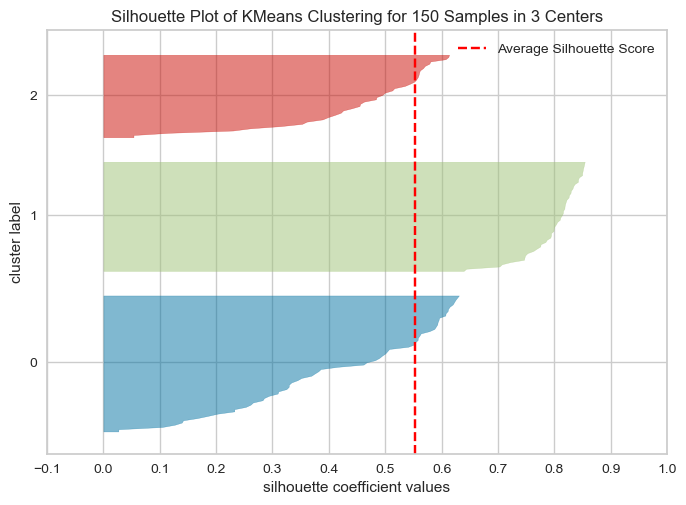

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
#visualizer 생성
visualizer_3 = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])      
visualizer_3.show()

# 6. K-Nearest Neighbors
* K최근접 이웃 알고리즘(지도학습 분류)
*어떤 범주로 나누어져 있는 데이터 셋이 있을 때(지도학습), 새로운 데이터가 추가된다면 이를 어떤 범주로 분류할 것인지를 결정할 때 사용할 수 있는 분류 알고리즘.
* K는 투표 과정에 참여할 최근접 이웃의 개수 파라미터

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
breast_cancer_data = load_breast_cancer() 

In [83]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [85]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [87]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [90]:
df_labels.value_counts()

1    357
0    212
Name: count, dtype: int64

In [93]:
print(breast_cancer_data.target_names) # 악성, 양성

['malignant' 'benign']


In [95]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 정규화

In [98]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [100]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 데이터셋 분리

In [102]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [103]:
print(len(train_X), len(train_y) , len(test_X), len(test_y))

455 455 114 114


## 모델링

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [106]:
classifier.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

## 평가

In [110]:
classifier.score(test_X, test_y)

0.9649122807017544

## k=1~100 시각화

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

KNeighborsClassifier(n_neighbors=40)

KNeighborsClassifier(n_neighbors=41)

KNeighborsClassifier(n_neighbors=42)

KNeighborsClassifier(n_neighbors=43)

KNeighborsClassifier(n_neighbors=44)

KNeighborsClassifier(n_neighbors=45)

KNeighborsClassifier(n_neighbors=46)

KNeighborsClassifier(n_neighbors=47)

KNeighborsClassifier(n_neighbors=48)

KNeighborsClassifier(n_neighbors=49)

KNeighborsClassifier(n_neighbors=50)

KNeighborsClassifier(n_neighbors=51)

KNeighborsClassifier(n_neighbors=52)

KNeighborsClassifier(n_neighbors=53)

KNeighborsClassifier(n_neighbors=54)

KNeighborsClassifier(n_neighbors=55)

KNeighborsClassifier(n_neighbors=56)

KNeighborsClassifier(n_neighbors=57)

KNeighborsClassifier(n_neighbors=58)

KNeighborsClassifier(n_neighbors=59)

KNeighborsClassifier(n_neighbors=60)

KNeighborsClassifier(n_neighbors=61)

KNeighborsClassifier(n_neighbors=62)

KNeighborsClassifier(n_neighbors=63)

KNeighborsClassifier(n_neighbors=64)

KNeighborsClassifier(n_neighbors=65)

KNeighborsClassifier(n_neighbors=66)

KNeighborsClassifier(n_neighbors=67)

KNeighborsClassifier(n_neighbors=68)

KNeighborsClassifier(n_neighbors=69)

KNeighborsClassifier(n_neighbors=70)

KNeighborsClassifier(n_neighbors=71)

KNeighborsClassifier(n_neighbors=72)

KNeighborsClassifier(n_neighbors=73)

KNeighborsClassifier(n_neighbors=74)

KNeighborsClassifier(n_neighbors=75)

KNeighborsClassifier(n_neighbors=76)

KNeighborsClassifier(n_neighbors=77)

KNeighborsClassifier(n_neighbors=78)

KNeighborsClassifier(n_neighbors=79)

KNeighborsClassifier(n_neighbors=80)

KNeighborsClassifier(n_neighbors=81)

KNeighborsClassifier(n_neighbors=82)

KNeighborsClassifier(n_neighbors=83)

KNeighborsClassifier(n_neighbors=84)

KNeighborsClassifier(n_neighbors=85)

KNeighborsClassifier(n_neighbors=86)

KNeighborsClassifier(n_neighbors=87)

KNeighborsClassifier(n_neighbors=88)

KNeighborsClassifier(n_neighbors=89)

KNeighborsClassifier(n_neighbors=90)

KNeighborsClassifier(n_neighbors=91)

KNeighborsClassifier(n_neighbors=92)

KNeighborsClassifier(n_neighbors=93)

KNeighborsClassifier(n_neighbors=94)

KNeighborsClassifier(n_neighbors=95)

KNeighborsClassifier(n_neighbors=96)

KNeighborsClassifier(n_neighbors=97)

KNeighborsClassifier(n_neighbors=98)

KNeighborsClassifier(n_neighbors=99)

KNeighborsClassifier(n_neighbors=100)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Validation Accuracy')

Text(0.5, 1.0, 'Breast Cancer Classifier Accuracy')

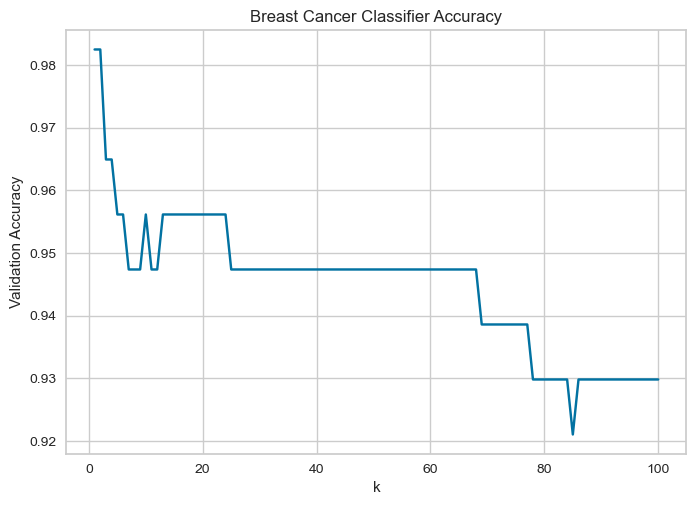

In [115]:
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_X, train_y)
    accuracies.append(classifier.score(test_X, test_y))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

# The End